# Demonstrating Simple workflow with XARRAY


In [1]:
import xarray
import netCDF4
import json

from dispel4py.workflow_graph import WorkflowGraph 
from dispel4py.provenance import *

import time
import random

from dispel4py.base import create_iterative_chain, ConsumerPE, IterativePE, SimpleFunctionPE

import matplotlib.pyplot as plt
import traceback

Simple Workflow, xarray in xarray out.

In [2]:
infile = 'input_simple.json'

The workflow is defined.

SETTING NAME: Read
SETTING NAME: Workflow
SETTING NAME: Write


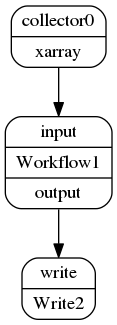

In [3]:


# project: CLIP_C
# authors: Alessandro and Andrej
# CLIPC combine function using dispel4py and running over jupyter

#print __dir__

class Read(GenericPE):
    
    def __init__(self):
        GenericPE.__init__(self)
        self._add_input('input')
        self._add_output('xarray')

    def _process(self,inputs):
        self.log('read_process')
     
        self.log(inputs)

        ds = xarray.open_dataset(inputs['input'][0])
    
        self.write( 'xarray' , (ds , inputs['input'][1]) )

class Write(GenericPE):
    
    def __init__(self):
        GenericPE.__init__(self)
        self._add_input('write')
        self._add_output('end')
        
    def _process(self,inputs):
        self.log('WriteFunction')
        
        output_nc = inputs['write'][0]
        
        output_nc.to_netcdf( inputs['write'][1] )
        
        #print output_nc.keys()
        
        output_nc.vDTR.plot()
       
        self.write('end', inputs )
        
        
class Workflow(GenericPE):
        
    def __init__(self):
        GenericPE.__init__(self)
        self._add_input('input')
        self._add_output('output')
        
    def _process(self,inputs):
        self.log('Workflow_process')
        
        #self.log(inputs)
        
        #nc = inputs['input'][0]
        nc = inputs['input'][0]
        #self.log(nc)
        
        #
        self.write('output', (nc , inputs['input'][1] ))


readX  = Read()
readX.name = 'collector'

wf     = Workflow()       

writeX = Write()


#Initialise the graph
graph = WorkflowGraph()    
graph.connect(readX ,'xarray'   , wf     ,'input')
graph.connect(wf    ,'output'   , writeX , 'write')

graph.flatten()

from dispel4py.visualisation import display

display(graph)

In [4]:
with open(infile) as data_file:    
    input_data = json.load(data_file)

print infile                                                     
print input_data                   
                                                     
#Launch in simple process
simple_process.process_and_return(graph, input_data)

input_simple.json
{u'collector': [{u'input': [u'data/newA.nc', u'data/newOut.nc']}]}
SETTING NAME: SimpleProcessingPE
collector0: read_process
collector0: {u'input': [u'data/newA.nc', u'data/newOut.nc']}
Workflow1: Workflow_process
Write2: WriteFunction
SimplePE: Processed 1 iteration.


{'Write2': {'end': [{'write': (<xarray.Dataset>
     Dimensions:  (time: 1, x: 424, y: 412)
     Coordinates:
       * x        (x) float64 -44.62 -44.36 -44.1 -43.84 -43.58 -43.32 -43.06 ...
       * y        (y) float64 21.98 22.1 22.23 22.35 22.47 22.59 22.72 22.84 ...
       * time     (time) datetime64[ns] 2099-01-16
     Data variables:
         vDTR     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
         crs      |S1 ''
     Attributes:
         description: Tier 1: vDTR. Multi-year period of records.
         keywords: CLIP-C,Tier 1,vDTR,rcp85,SMHI-RCA4
         activity: CLIP-C project
         method: CLIVAR panel ETCCDI
         software: ADAGUC WCS Server version 2.0.15
         software_project: IS-ENES: climate for impact web portal
         software_reference: ICCLIM Documentation 3.0: https://media.readthedocs.org/pdf/icclim/latest/icclim.pdf
         institution: CERFACS
         institution_url: http://www.cerfacs.fr/globc
         contact_email_

In [5]:
plt.show()    

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):
